<a href="https://colab.research.google.com/github/mshilpaa/EVA4/blob/master/Session%2014/Overlay_fg_on_bg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from IPython.display import Image as IMAGE
import numpy as np
from PIL import Image,ImageOps
import os
import matplotlib.pyplot as plt
import random

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


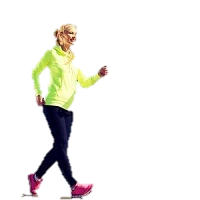

In [6]:
img = Image.open('/content/gdrive/My Drive/eva_files/rcnn/p2.png')
ImageOps.mirror(img)

In [0]:
# resize images
os.mkdir('/content/gdrive/My Drive/eva_files/rcnn/fg-100x100')
p = '/content/gdrive/My Drive/eva_files/rcnn/fg-100x100'
imglist = os.listdir('/content/gdrive/My Drive/eva_files/rcnn/people-no bg')
for i in range(1,len(imglist)+1):
  file = '/content/gdrive/My Drive/eva_files/rcnn/people-no bg/'+str(i)+'.jpg'
  im = Image.open(file)
  im1 = im.resize((100,100))
  im1.save(os.path.join(p,'fg'+str(i)+'.png'))

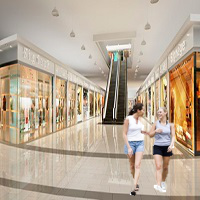

In [81]:
loc =[[0,0],[100,100]]
bg = Image.open('/content/gdrive/My Drive/eva_files/rcnn/bg-resized/2.jpg')
fg = Image.open('/content/gdrive/My Drive/eva_files/rcnn/fg-no-bg-100x100/1.png')
fg1 = ImageOps.mirror(fg)
bg.paste(fg1,loc[1],fg1)
bg

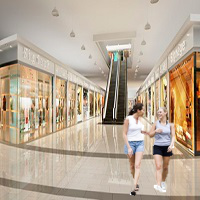

In [83]:
bg1 = bg.copy()
bg1

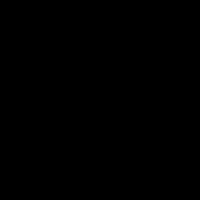

In [39]:
black = np.zeros((200,200,3))
black_img = Image.fromarray(black,mode='RGB')
black_img

create folders to save overlay and flipped images


In [0]:
os.mkdir('/content/gdrive/My Drive/eva_files/rcnn/fg-flip-100x100')
os.mkdir('/content/gdrive/My Drive/eva_files/rcnn/fg-flip-mask-100x100')
os.mkdir('/content/gdrive/My Drive/eva_files/rcnn/fg-bg')
os.mkdir('/content/gdrive/My Drive/eva_files/rcnn/fg-bg-mask')

overlay the images:

eg:
2 fg :
1fg - 1i , 1f -> normal,flipped
2f - 2i,2f

2bg: bg1,bg2

bg1:
1i - 1-20      /  2i - 21-40
1f - 81-100    /  2f - 101-120

bg2:
1i - 41-60      /  2i - 61-80
1f - 121-140    /  2f - 141-160

thus, last = 80

In [85]:
# the below variable last tells from where to start numbering flipped images
# this value should be len of (fg + fg flip images)* 20 random locations, here (2+2)*20 = 80 
last=80 

i=1
p = '/content/gdrive/My Drive/eva_files/rcnn/'

for fg_img in range(1,3):

  black = np.zeros((224,224,3))
  fg = Image.open(p+'fg-no-bg-100x100/'+str(fg_img)+'.png')
  fg_mask = Image.open(p+'fg-mask-100x100/'+str(fg_img)+'.png')
  # flip the images
  fg_flip = ImageOps.mirror(fg)
  fg_mask_flip = ImageOps.mirror(fg_mask)
  # save flipped images 
  fg_flip.save(p+'fg-flip-100x100/'+str(fg_img)+'.png')
  fg_mask_flip.save(p+'fg-flip-mask-100x100/'+str(fg_img)+'.png')

  for bg_img in range(1,3):


    for _ in range(20):
      x = random.randint(0,100)
      y = random.randint(0,100)

      bg = Image.open(p+'bg-resized/'+str(bg_img)+'.jpg')
        
      # overly fg on bg
      bg.paste(fg,(x,y),fg)
      bg.save(p+'fg-bg/'+str(i)+'.png')

      
      black_img = Image.fromarray(black,mode='RGB')
      # overlay fg-mask on bg-mask
      
      black_img.paste(fg_mask,(x,y),fg_mask)
      black_img.save(p+'fg-bg-mask/'+str(i)+'.png')

      # print(p+'fg-bg/'+str(i)+'.png',p+'fg-bg-mask/'+str(i)+'.png')

      x = random.randint(0,100)
      y = random.randint(0,100)
      # flip fg
      bg = Image.open(p+'bg-resized/'+str(bg_img)+'.jpg')
      
      # overlay fg-flip on bg
      bg.paste(fg_flip,(x,y),fg_flip)
      bg.save(p+'fg-bg/'+str(last+i)+'.png')
      
    
      # overlay fg-flip-mask on bg
      black_img = Image.fromarray(black,mode='RGB')
      
      black_img.paste(fg_mask_flip,(x,y),fg_mask_flip)
      black_img.save(p+'fg-bg-mask/'+str(last+i)+'.png')
      # print(p+'fg-bg/'+str(last+i)+'.png',p+'fg-bg-mask/'+str(last+i)+'.png')
      i+=1

/content/gdrive/My Drive/eva_files/rcnn/fg-bg/1.png /content/gdrive/My Drive/eva_files/rcnn/fg-bg-mask/1.png
/content/gdrive/My Drive/eva_files/rcnn/fg-bg/81.png /content/gdrive/My Drive/eva_files/rcnn/fg-bg-mask/81.png
/content/gdrive/My Drive/eva_files/rcnn/fg-bg/2.png /content/gdrive/My Drive/eva_files/rcnn/fg-bg-mask/2.png
/content/gdrive/My Drive/eva_files/rcnn/fg-bg/82.png /content/gdrive/My Drive/eva_files/rcnn/fg-bg-mask/82.png
/content/gdrive/My Drive/eva_files/rcnn/fg-bg/3.png /content/gdrive/My Drive/eva_files/rcnn/fg-bg-mask/3.png
/content/gdrive/My Drive/eva_files/rcnn/fg-bg/83.png /content/gdrive/My Drive/eva_files/rcnn/fg-bg-mask/83.png
/content/gdrive/My Drive/eva_files/rcnn/fg-bg/4.png /content/gdrive/My Drive/eva_files/rcnn/fg-bg-mask/4.png
/content/gdrive/My Drive/eva_files/rcnn/fg-bg/84.png /content/gdrive/My Drive/eva_files/rcnn/fg-bg-mask/84.png
/content/gdrive/My Drive/eva_files/rcnn/fg-bg/5.png /content/gdrive/My Drive/eva_files/rcnn/fg-bg-mask/5.png
/content/gd